<H1><bold>LIBRARIES & DEPENDENCIES</bold></h1>

In [1]:
#!pip install BeautifulSoup4
#!pip install requests
#!pip install numpy
#!pip install pandas
#!pip install python-dateutil
#!pip install datetime
#
#!pip install bkcharts
#!pip install geopy

In [1]:
import requests
from bs4 import BeautifulSoup

In [63]:
import re
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
#import geopy

from matplotlib import style
from matplotlib.pyplot import figure
from dateutil import parser
from pylab import rcParams

#from geopy.geocoders import Nominatim
#from geopy.distance import distance
#from geopy.exc import GeocoderTimedOut
#geolocator = Nominatim()

import datetime
#import bkcharts

#from bkcharts import Bar, output_file, show

style.use('fivethirtyeight')

<H1><BOLD>SCRAPE WEB DATA</BOLD></H1>

In [3]:
url = 'http://data.delawareonline.com/webapps/crime/'
page = requests.get(url)

In [4]:
soup = BeautifulSoup(page.text, 'html.parser')

In [5]:
pagenum = soup.find_all(class_="pagination pagination-centered")
pagenum = pagenum[0].find("span").find_next("span").contents[0]
pagenum = re.split('Page 1 of ',pagenum)
pagenumnum = int(pagenum[1])
print(pagenumnum)

109


In [6]:
#index = {'ID','type','datetime','location'}
#data = pd.DataFrame(columns = index)
#print(data)
data = []
headers = []

In [7]:
urlbase = 'http://data.delawareonline.com/webapps/crime/'
counter = 1
for x in range(1,pagenumnum+1):
#for x in range(1,2):
    if x > 1:
        url = urlbase+'?time_frame=None&page='+str(x)
    else:
        url = urlbase
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for incident in soup.find_all(class_='incident'):
        itype = incident.div.contents[1].contents[0]
        itype = re.sub('^\s*','',itype)

        idatetime = incident.div.contents[2]
        idatetime = re.sub('^\s*','',idatetime)
        idatetime = re.sub('\s*$','',idatetime)
        idatetime = idatetime.replace('noon','12:00 p.m.')
        idatetime = idatetime.replace('midnight','12:00 a.m.')
        idatetime = idatetime.replace(', None','')
        idatetime = parser.parse(idatetime)

        month = idatetime.month
        date = idatetime.day
        year = idatetime.year
        hour = idatetime.hour
        
        ilocation = incident.strong.next_element.next_element
        ilocation = re.sub('In the area of ','',ilocation)
        ilocation = ilocation.strip()
        ilocation2 = ilocation.replace('block of','')
        #{'ID','type','datetime','location'}
        
        #print(incident)
        ##ielse = incident.p.contents[0]
        ielse = str(incident.p.contents)
        ielse2 = re.search('\[(.*)\]',ielse)
        
        i = [idatetime, month, date, year, hour, itype, ilocation, ilocation2, ielse2.group(1)]
        #print(i)
        #print(ielse)
        #data.append(i, ignore_index=True)
        data.append(i)
        
        
        #print(ilocation)
        counter = counter + 1

In [8]:
#print(data)
headers = ['date','month','day','year','hour','type','location','location2','info']

In [9]:
df = pd.DataFrame(data,columns=headers)

In [10]:
df2 = []
df2 = df
df2 = df2.set_index(['date'])
#print(df2.head())

<H1><BOLD>DATA ANALYSIS</BOLD></H1>

In [11]:
df2['info']

date
2020-07-29 01:55:00    'A 24-year-old man was shot in the 900 block o...
2020-07-28 22:55:00    "Four people shot, two of them fatally, late T...
2020-07-27 16:50:00    "A 17-year-old boy was critically wounded Mond...
2020-07-26 23:05:00    "A 14-year-old boy was shot in the city's Hill...
2020-07-24 18:35:00    "Two teenagers were shot in Wilmington's River...
2020-07-23 13:45:00    "A 21-year-old man was reported to be stable a...
2020-07-18 05:25:00    'A 16-year-old boy was stable after being shot...
2020-07-16 18:50:00    "A shooting in the city's Riverside section Th...
2020-07-14 22:00:00    "A 16-year-old boy was shot Tuesday night in W...
2020-07-13 03:45:00    "A 29-year-old man was shot early Monday morni...
2020-07-12 20:50:00    'Police were called to the 800 block of West 2...
2020-07-11 22:35:00    "Four teens and a 10-year-old boy were shot in...
2020-07-09 01:25:00    "A 21-year-old man was critically wounded afte...
2020-07-07 23:55:00    "Two men were shot late

In [13]:
#select by date in index (REVERSE CHRONOLOGICAL)
#print(df2['12/31/2018':'1/1/2017'])

In [14]:
#searching column for instances
#print(df2[df2['info'].str.contains('Christiana')])

In [15]:
#create type encoding into numbers as separate column
#df2.loc[df2['type'].str.contains('HOMICIDE'),'type2'] = 1


In [16]:
#look at data
#print(df2['location2'])

In [12]:
df2['hospital'] = df2['info'].str.extract('(\w*) Hospital')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':


In [13]:
#searching column for instances
pd.set_option('display.max_colwidth',-1)
#df2.loc[df2['info'].str.contains('Hilltop', case=False),'info']

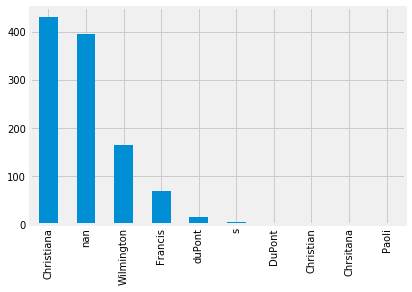

In [14]:
#barplot/value counts of hospital location
#df2['hospital']=df2['hospital'].fillna('Unknown')
df2['hospital'].value_counts(dropna=False).plot(kind='bar')

In [15]:
#create zip data
df2['zip'] = df2['location'].str.extract('(\d{5})')

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  from ipykernel import kernelapp as app


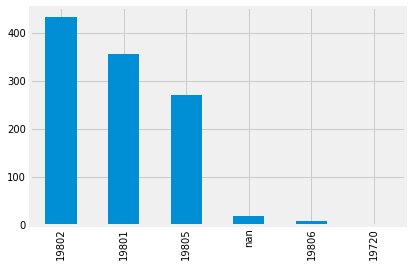

In [16]:
#barplot/value counts of zip
df2['zip'].value_counts(dropna=False).plot(kind='bar')

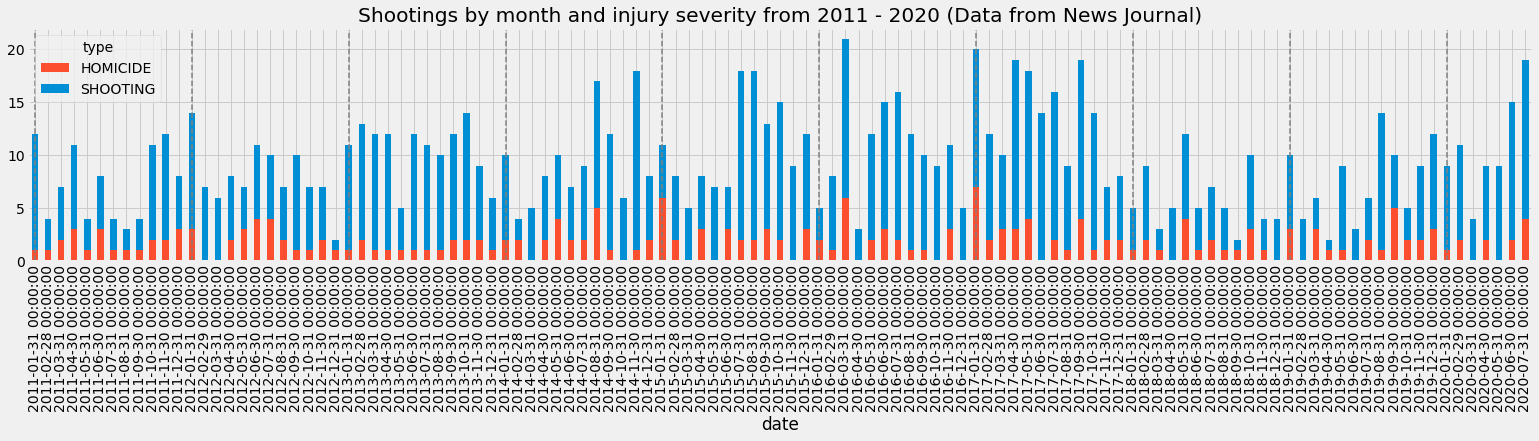

In [97]:
#Histogram zip grouped by month from 2016-2020
rcParams['figure.figsize'] = 24,4

#figure(figsize=(6,12), dpi=50, facecolor='w', edgecolor='k')
df2['2020':'2011'].loc[:,'type'].groupby(pd.Grouper(freq='M')).value_counts().unstack().plot(color=['#fc4f30','#008fd5'], kind='bar', stacked=True)
plt.title('Shootings by month and injury severity from 2011 - 2020 (Data from News Journal)')

xposition = np.arange(0,118,12).tolist()
for xc in xposition:
    plt.axvline(x=xc, linewidth=1.5, color='gray', ls='--')

In [94]:
x = pd.DataFrame(df2['2020':'2011'].loc[:,'type'].groupby(pd.Grouper(freq='M')).value_counts())
x.to_excel("shooting tallies.xlsx")

In [95]:
y = pd.DataFrame(df2['2020':'2011'].loc[:,'month'].groupby(pd.Grouper(freq='M')).value_counts())
y.to_excel("shooting tallies by month.xlsx")

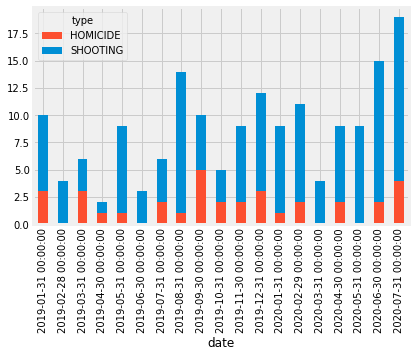

In [18]:
#Histogram zip grouped by month
df2['2020':'2019'].loc[:,'type'].groupby(pd.Grouper(freq='M')).value_counts().unstack().plot(color=['#fc4f30','#008fd5'], kind='bar', stacked=True)

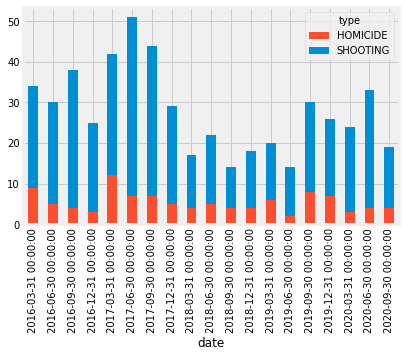

In [19]:
#Histogram zip grouped by month from 2018-2020
df2['2020':'2016'].loc[:,'type'].groupby(pd.Grouper(freq='Q')).value_counts().unstack().plot(color=['#fc4f30','#008fd5'], kind='bar', stacked=True)

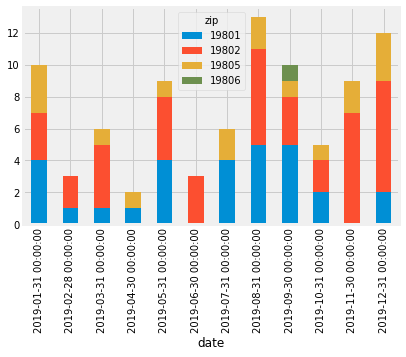

In [20]:
#Histogram zip grouped by month from 2016-2018
df2['2019'].loc[:,'zip'].groupby(pd.Grouper(freq='M')).value_counts().unstack().plot(kind='bar', stacked=True)

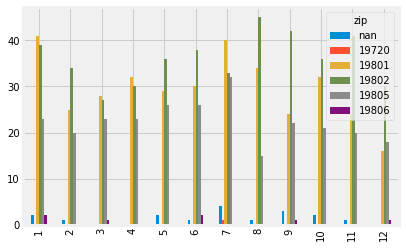

In [26]:
#Histogram zip grouped by month from 2016-2018
df2['zip'].groupby(df2.index.month).value_counts(dropna=False).unstack().plot.bar(stacked=False)

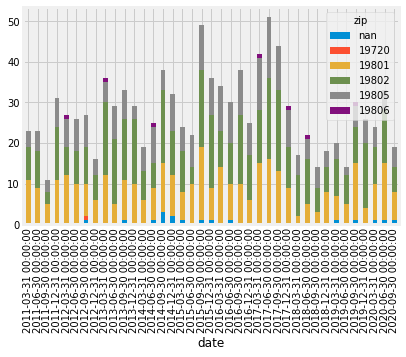

In [21]:
#Histogram/barplot zip by quarter
df2['zip'].groupby(pd.Grouper(freq='Q')).value_counts(dropna=False).unstack().plot.bar(stacked=True)

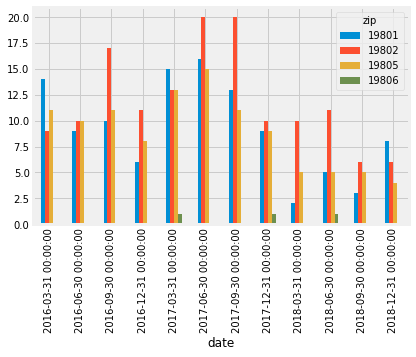

In [28]:
#Histogram/barplot zip by quarter
df2['2018':'2016'].loc[:,'zip'].groupby(pd.Grouper(freq='Q')).value_counts().unstack().plot(kind='bar', stacked=False)

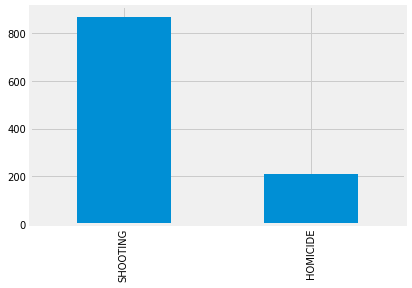

In [29]:
#histogram of shooting type
df2['type'].value_counts(dropna=False).plot(kind='bar')


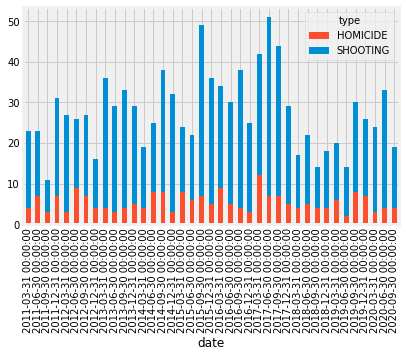

In [22]:
#Histogram shooting type grouped by quarter
#df2['type'].groupby(pd.Grouper(freq='A')).value_counts(dropna=False).plot.bar()
df2['type'].groupby(pd.Grouper(freq='Q')).value_counts(dropna=False).unstack().plot.bar(color=['#fc4f30','#008fd5'], stacked=True)

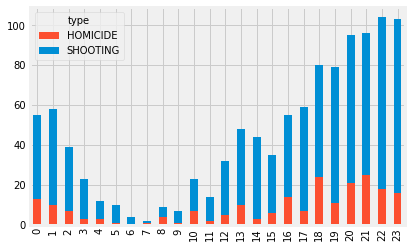

In [28]:
#Histogram shooting type grouped by hour of the day
#df2['type'].groupby(df2.index.hour).count().plot.bar()
df2['type'].groupby(df2.index.hour).value_counts(dropna=False).unstack().plot.bar(color=['#fc4f30','#008fd5'], stacked=True)


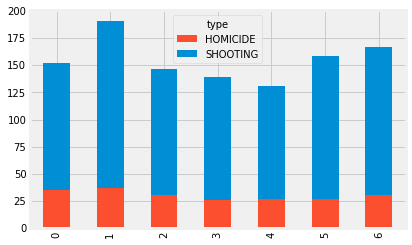

In [24]:
#Histogram shooting type grouped by day of the week
df2['type'].groupby(df2.index.weekday).value_counts(dropna=False).unstack().plot.bar(color=['#fc4f30','#008fd5'], stacked=True)


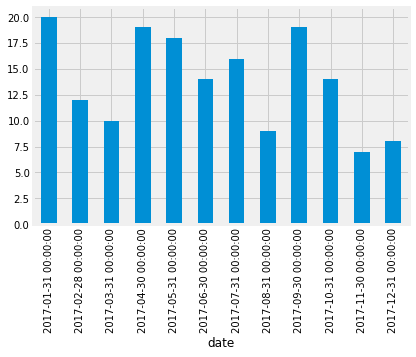

In [25]:
df2['2017'].loc[:,'type'].groupby(pd.Grouper(freq='M')).count().plot(kind='bar')

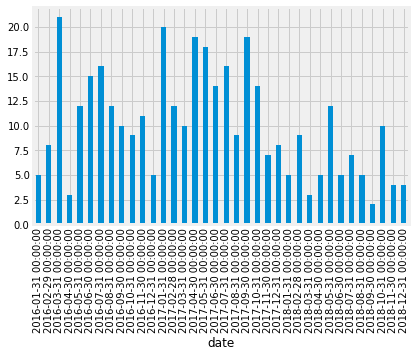

In [29]:
df2['2018':'2016'].loc[:,'type'].groupby(pd.Grouper(freq='M')).count().plot(kind='bar')

In [35]:
currdate = datetime.datetime.now()
df2.to_csv('shootings' + currdate.strftime("%Y%m%d") + '.csv')

<h1><bold>GEOCODING</bold></h1>

In [36]:
##Example of single address geocoding 
#ex1 = df2.iloc[5,1]
#print(ex1)
#location = geolocator.geocode(ex1)
#if location is not None:
#    print(location.address)
#    print(location.raw)
#    print((location.latitude,location.longitude))
#else:
#    print('No location!')

In [37]:
#def do_geocode(address):
#    geopy = Nominatim()
#    try:
#        return geopy.geocode(address,exactly_one=True)
#    except GeocoderTimedOut:
#        return do_geocode(address)
#
#df2['location3']=df2['location2'].apply(lambda x: do_geocode(x) if x != None else None)

In [38]:
#print(df2['location3'])

In [39]:
#lat=[]
#for i in df2['location3']:
#    if i== None:
#        lat.append(None)
#    else:
#        lat.append(i.latitude)
#df2['latitude']=lat
#df2['latitude'].astype('float')

In [40]:
#long=[]
#for i in df2['location3']:
#    if i== None:
#        long.append(None)
#    else:
#        long.append(i.longitude)
#df2['longitude']=long
#df2['longitude'].astype('float')

In [41]:
#Alternative code for geolocation; however will NOT permit timeouts

#coordinate = []
#for index in df2['location2']:
#    location = geolocator.geocode(index)
#    if location is not None:
#        coordinate.append(location)
#    else:
#        coordinate.append('None')
#        
#df2['coordinate'] = coordinate

In [42]:
#(df2.iloc[1].latitude,df2.iloc[1].lo